graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot_data = StringIO()
export_graphviz(rf.estimators_[0], out_file=dot_data)

In [1]:
import math

import pandas as pd
import numpy as np

from IPython.display import Image 

from sklearn.externals.six import StringIO 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import metrics
# import pydotplus

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./input/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea'] + df['EnclosedPorch'] + df['ScreenPorch']

In [5]:
df = df[df['TotalSF'] < 7000]

In [6]:
df.SalePrice = np.log(df.SalePrice)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['TotalSF']], df['SalePrice'])

In [8]:
def plot_results(X_test, y_preds):
    plt_df = pd.DataFrame()
    plt_df['TotalSF'] = X_test['TotalSF']
    plt_df['preds'] = y_preds

    plt_df.sort_values('TotalSF', axis=0, inplace=True)

    plt.figure(figsize=(20,10))
    plt.scatter(X_train, y_train, s=5)
    plt.plot(plt_df['TotalSF'], plt_df['preds'], color='red', linewidth=2)
    plt.legend()
    plt.show()

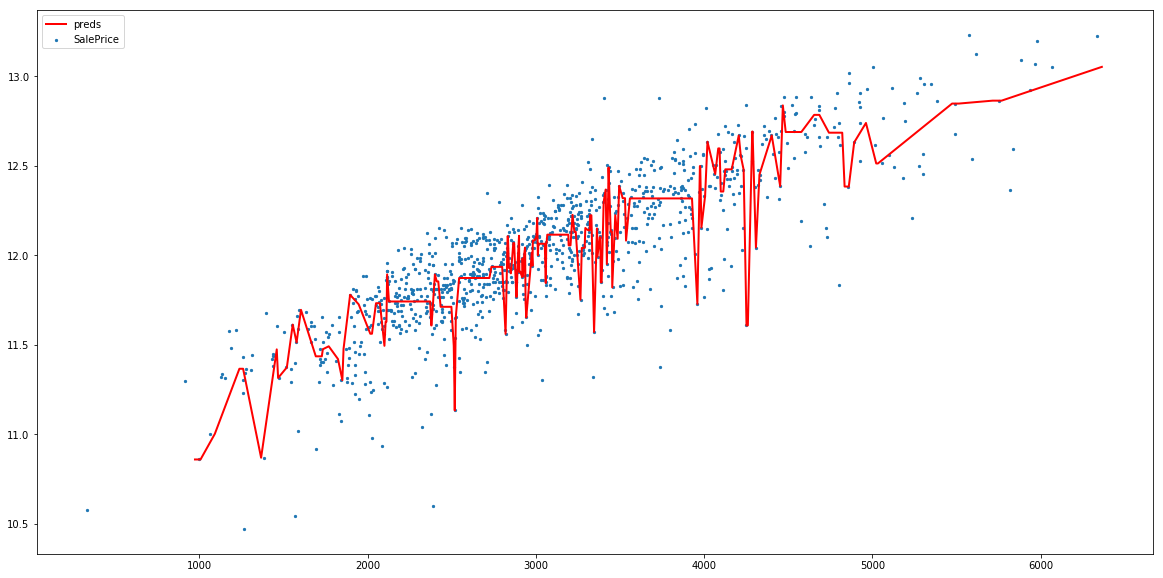

In [9]:
rf = RandomForestRegressor(max_depth=10, n_estimators=1)
rf.fit(X=X_train, y=y_train)
y_preds = rf.predict(X_test)
plot_results(X_test, y_preds)

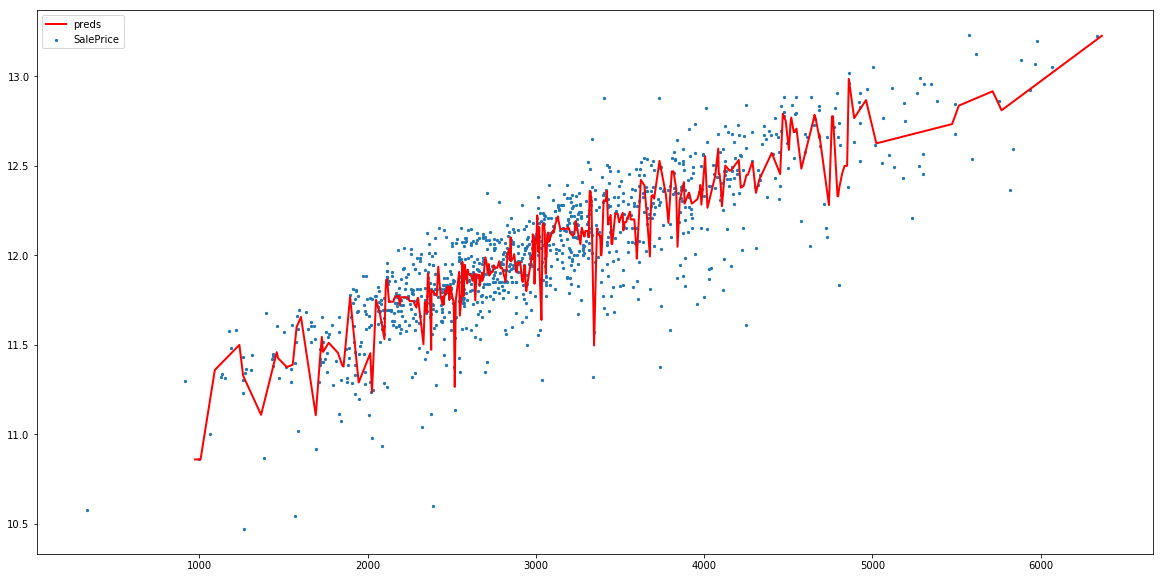

In [10]:
rf = RandomForestRegressor(max_depth=10, n_estimators=5)
rf.fit(X=X_train, y=y_train)
y_preds = rf.predict(X_test)
plot_results(X_test, y_preds)

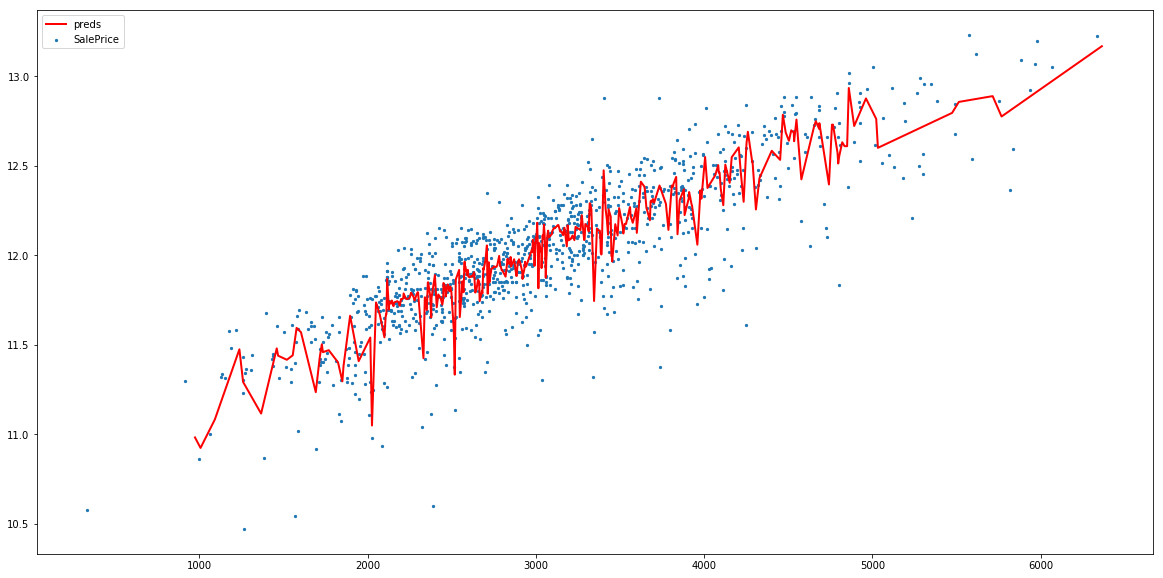

In [11]:
rf = RandomForestRegressor(max_depth=10, n_estimators=20)
rf.fit(X=X_train, y=y_train)
y_preds = rf.predict(X_test)
plot_results(X_test, y_preds)

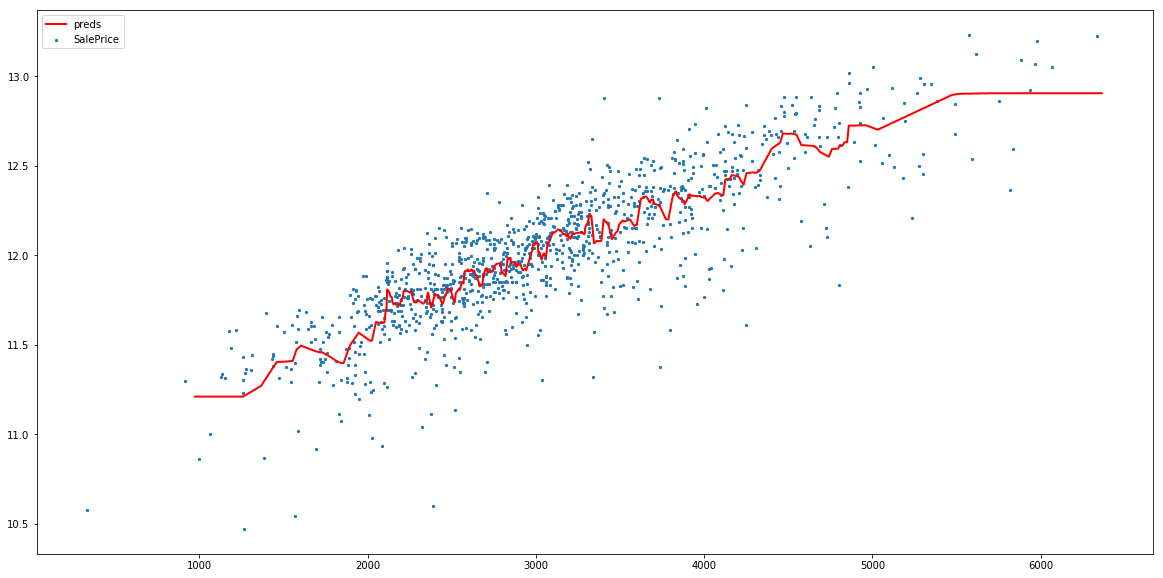

In [12]:
rf = RandomForestRegressor(max_depth=100, n_estimators=200, min_samples_leaf=10)
rf.fit(X=X_train, y=y_train)
y_preds = rf.predict(X_test)
plot_results(X_test, y_preds)

In [13]:
rf.score(X_test, y_test)

0.6796413176527702

In [14]:
np.sqrt(metrics.mean_squared_error(y_test, y_preds))

0.22181358636384435